In [2]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [3]:
def print_sample(sample):
    x = sample['x'].permute(1, 2, 0)
    y = sample['y'].permute(1, 2, 0)
    grid = make_grid(x, y)
    plt.imshow(grid)
    plt.show()

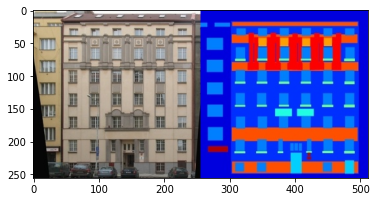

In [4]:
from torchvision.io import read_image
from pathlib import Path

img = read_image(path=str(Path('./data/facades/test/1.jpg')))
print_sample({'x':img, 'y':img})